In [1]:
import numpy as np                # импорт бибилиотеки numpy
import matplotlib.pyplot as plt   # импорт модуля matplotlib.pyplot

def quantize_uniform(x, quant_min=-1, quant_max=1, quant_level=5):
    """Uniform quantization approach
    From: Müller M. Fundamentals of music processing: Audio, analysis, algorithms, applications. – Springer, 2015.
    Notebook: C2S2_DigitalSignalQuantization.ipynb
    Args:
        x: Original signal
        quant_min: Minimum quantization level
        quant_max: Maximum quantization level
        quant_level: Number of quantization levels
    Returns:
        x_quant: Quantized signal
    """
    x_normalize = (x-quant_min) * (quant_level-1) / (quant_max-quant_min)
    x_normalize[x_normalize > quant_level - 1] = quant_level - 1
    x_normalize[x_normalize < 0] = 0
    x_normalize_quant = np.around(x_normalize)
    x_quant = (x_normalize_quant) * (quant_max-quant_min) / (quant_level-1) + quant_min
    return x_quant

In [2]:
# Вариант №4
N=12                                    # Число отсчетов по времени
f0=200.0                                # Частота синусоиды в Гц
fs=600.0                                # Частота дискретизации в Гц
k=np.arange(N)                          # Mассив времен k от 0 до N-1 с шагом 1
x=np.sin(2*np.pi*(f0/fs)*k)             # Последовательность x[k]
num_levels=9                            # число уровней квантования

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


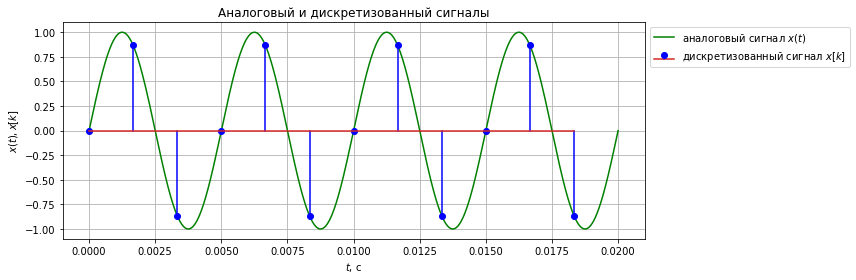

In [3]:
# Построение графиков аналогового и дискретизованного сигнала
plt.figure(figsize=[12, 4])             # создание полотна размером шириной 8 X 4 дюйма
t=np.linspace(0, N/fs, num=1024)        # создание массива времен t (1024 значения от 0 до N*fs)

plt.plot(t, np.sin(2*np.pi*f0*t), 'g', label='аналоговый сигнал $x(t)$')  
                                        # построение графика x(t) (точки соединяются линиями)
                                        # 'g' означает, что используется зеленая линия (green)
plt.stem(k/fs, x, 'b', 'bo', label='дискретизованный сигнал $x[k]$')            
                                        # построение графика функции дискретного времени x[k]
                                        # 'b', 'bo' означает, что отсчеты оборажаются синим цветом (blue)
plt.grid()                              # сетка
plt.xlabel("$t$, c")                    # подпись оси X
plt.ylabel("$x(t), x[k]$")              # подпись оси Y
plt.title("Аналоговый и дискретизованный сигналы") # заголовок графика
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()                      # автоматическая корректировка расположения осей графика

In [4]:
# моделирование квантования дискретного сигнала
y=quantize_uniform(x, quant_min=-1, quant_max=1, quant_level=num_levels)
bins=np.linspace(-1, 1, num_levels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


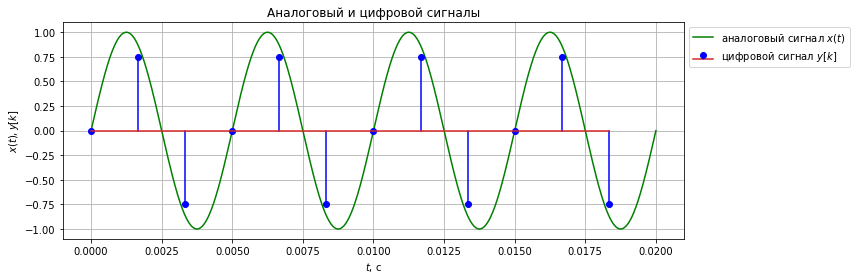

In [5]:
# Вывод графика аналогового и цифрового сигнала
plt.figure(figsize=[12, 4])                  # создание полотна размером шириной 8 X 4 дюйма
t=np.linspace(0, N/fs, num=1024)            # создание массива времен t (1024 значения от 0 до N*fs)
plt.plot(t, np.sin(2*np.pi*f0*t), 'g', label='аналоговый сигнал $x(t)$')        
                                            # построение графика x(t) (точки соединяются линиями)

plt.stem(k/fs, y, 'b', 'bo', label='цифровой сигнал $y[k]$')                
                                            # построение графика функции дискретного времени y[k]
                                            # k/fs - м
    
if num_levels<21:                           # если число уровней не велико, то производится
    plt.yticks(bins)                        # установка делений шкалы оси Y, совпадающих с уровнями квантования

plt.grid()                                  # сетка
plt.xlabel("$t$, c")                        # подпись оси X
plt.ylabel("$x(t), y[k]$")                  # подпись оси Y
plt.title("Аналоговый и цифровой сигналы")  # заголовок графика
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()                          # автоматическая корректировка расположения осей графика

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


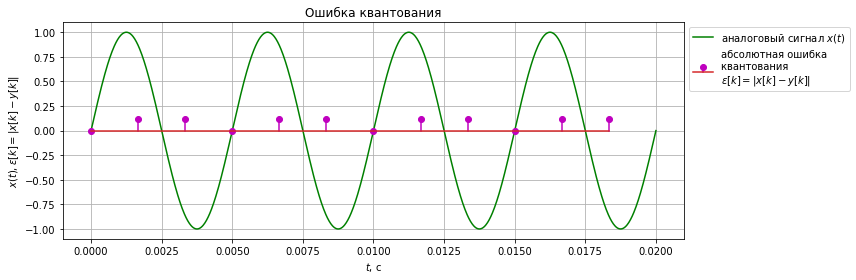

In [6]:
plt.figure(figsize=[12, 4])
plt.title("Ошибка квантования") 
plt.plot(t, np.sin(2*np.pi*f0*t), 'g', label='аналоговый сигнал $x(t)$')
plt.stem(k/fs, abs(x-y), 'm', 'mo', label="абсолютная ошибка \nквантования \n$\\epsilon[k]=|x[k]-y[k]|$")       
                                      #вывод абсолютных значений ошибки квантования для дискретного сигнала
plt.yticks(bins)
plt.grid()
plt.xlabel("$t$, c")                                          # подпись оси X
plt.ylabel("$x(t), \\varepsilon[k]=|x[k]-y[k]|$")             # подпись оси Y
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.show()